In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time

In [5]:
options = Options()
options.add_experimental_option("detach", True)
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

In [6]:
driver.get('https://www.naver.com/') # 사이트 연결하기
print(driver.title)     # 타이틀 읽어오기
time.sleep(1)           # 3초 대기하기

NAVER


검색창 사용하기 

<input id="query" name="query" type="search" title="검색어 입력" maxlength="255" class="input_text" tabindex="1" accesskey="s" style="ime-mode:active;" autocomplete="off" placeholder="검색어를 입력해 주세요." onclick="document.getElementById('fbm').value=1;" value="" data-atcmp-element="">

In [7]:
driver.find_element(By.CLASS_NAME, "input_text").send_keys("파이썬") # 검색창에 키워드 입력하기

In [ ]:
driver.find_element(By.ID, "query").send_keys("뉴진스") # 검색창에 키워드 입력하기
time.sleep(1)
driver.find_element(By.NAME, "query").send_keys("인하공전") # 검색창에 키워드 입력하기

In [ ]:
driver.find_element(By.CSS_SELECTOR, "#query").send_keys("RPA") # 검색창에 키워드 입력하기

In [8]:
driver.find_element(By.XPATH, '//*[@id="query"]').send_keys("RPA") # 검색창에 키워드 입력하기

링크 클릭하기 

In [9]:
driver.find_element(By.LINK_TEXT, "쇼핑LIVE").click() # 쇼핑LIVE 클릭하기

In [12]:
driver.find_element(By.PARTIAL_LINK_TEXT, "뉴스").click() # 일부만 있는 경우 사용 

여러 정보 가져오기 

In [13]:
navs = driver.find_elements(By.CSS_SELECTOR, ".nav") # 네이버 메뉴 읽어오기
for nav in navs:
    print(nav.text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV
사전
뉴스
증권
부동산
지도
VIBE
도서
웹툰


뉴스
/html/body/div[2]/div[2]/div[2]/div[1]/div[1]/ul[2]/li[2]/a

In [17]:
elem = driver.find_elements(By.XPATH, '/html/body/div[2]/div[2]/div[2]/div[1]/div[1]/ul[2]/li[2]/a')
print(elem)
elem[0].click()

[<selenium.webdriver.remote.webelement.WebElement (session="14af73ab071605ed0c24d21381e1c217", element="1016aaf3-f90d-400f-9773-8fa58911b360")>]


검색창
/html/body/section/header/div[1]/div/div/div[2]/div[3]/a/span

In [18]:
elem = driver.find_elements(By.XPATH, '/html/body/section/header/div[1]/div/div/div[2]/div[3]/a/span')
print(elem)
elem[0].click()

[<selenium.webdriver.remote.webelement.WebElement (session="14af73ab071605ed0c24d21381e1c217", element="007ee77d-d21a-432e-b3c1-996aee7fc800")>]


질의어를 입력하고 결과 얻기 
- 개발자 도구 
- input 태그 선택 
- name="q"

In [19]:
elem = driver.find_element(By.NAME, 'query')
print(elem)

<selenium.webdriver.remote.webelement.WebElement (session="14af73ab071605ed0c24d21381e1c217", element="c223677e-4ee4-4476-992a-d0dd145b73dd")>


get_attribute() : 요소가 갖는 속성값 확인 

In [7]:
# 각각의 속성 값 가져오기
print(elem.get_attribute('id'), elem.get_attribute('name'), elem.get_attribute('class'))

 query u_it _search_input


In [8]:
# 태그 이름 확인하기 
print(elem.tag_name)

input


In [20]:
elem.send_keys("인하공전" + Keys.RETURN)   # 텍스트 입력 후 클릭

In [32]:
# 페이제 내용 읽어와 일부 내용 확인하기 
html = driver.page_source
print(html[1200:2200])
len(html)

le=no,target-densitydpi=medium-dpi">
	<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/static.news/mnews/resources/20230323_015525/css/generated/newshome.css">
			<link rel="shortcut icon" type="image/x-icon" href="https://mimgnews.pstatic.net/image/news/m/2014/favicon/favicon.ico">
<script>
	(function(){
		var userAgent = navigator.userAgent;
		var result = [];

		if(userAgent.indexOf('Android') > -1){
			result = [
				'<link rel="apple-touch-icon-precomposed" sizes="72x72" href="https://ssl.pstatic.net/static.news/image/news/m/2018/favicon/06/android_legacy_hdpi_72X72.png" />',
				'<link rel="apple-touch-icon-precomposed" sizes="96x96" href="https://ssl.pstatic.net/static.news/image/news/m/2018/favicon/06/android_legacy_xhdpi_96x96.png" />',
				'<link rel="apple-touch-icon-precomposed" sizes="144x144" href="https://ssl.pstatic.net/static.news/image/news/m/2018/favicon/06/android_legacy_xxhpdi_144x144.png" />',
				'<link rel="apple-touch-icon-precomposed" sizes

752897

뉴스 기사 타이틀

#sp_nws8 > div > div > a

In [22]:
# 필요한 요소 찾기 
elements = driver.find_elements(By.CLASS_NAME, 'news_tit')
print(elements)
for tag in elements:
  print(tag.text, '-', tag.find_element(By.TAG_NAME, 'a').get_attribute('href'))

[]


BeautifulSoup 이용하기

[]
<html lang="ko" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36" class="is_search_opened"><head>
		<title id="browserTitleArea">네이버 뉴스</title>
		


<script>
	function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
</script>
<script>
	(function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
</script>

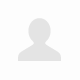
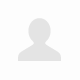

In [31]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
links = soup.select('.news_tit')          # 결과는 리스트 
print(links)
